In [1]:
!pip install -q transformers[sentencepiece]

In [2]:
import torch
from transformers import MarianMTModel, MarianTokenizer

In [3]:
checkpoint = 'Helsinki-NLP/opus-mt-en-ru' # предобученная модель EN-RU

# Предобученная модель с Hub

In [4]:
model = MarianMTModel.from_pretrained(checkpoint)
tokenizer = MarianTokenizer.from_pretrained(checkpoint)

In [5]:
def translate(text='Hello, World!'):
    input_ids = tokenizer(text, return_tensors="pt").input_ids # Batch size 1
    output_ids = model.generate(input_ids)[0]
    output = tokenizer.decode(output_ids, skip_special_tokens=True)
    return output
translate('Security of online payments')

'Обеспечение онлайновых платежей'

# Обученная модель в Colab

Для обучения использовалось 79916 парных предложений, которые применены к модели 'Helsinki-NLP/opus-mt-en-ru'; время: 2:37:01

Веса модели были загружены из Colab в локальную систему и инициализированы в объекты:

In [6]:
model = MarianMTModel.from_pretrained("first-fine-tuning-model")
tokenizer = MarianTokenizer.from_pretrained("first-fine-tuning-model")

In [7]:
def translate(text='Hello, World!'):
    input_ids = tokenizer(text, return_tensors="pt").input_ids # Batch size 1
    output_ids = model.generate(input_ids)[0]
    output = tokenizer.decode(output_ids, skip_special_tokens=True)
    return output
translate('Security of online payments')

'Безопасность онлайн-платежей'

# Примечание

## Выбор Colab обусловлен тем, что для обучения в Kaggle не хватает памяти

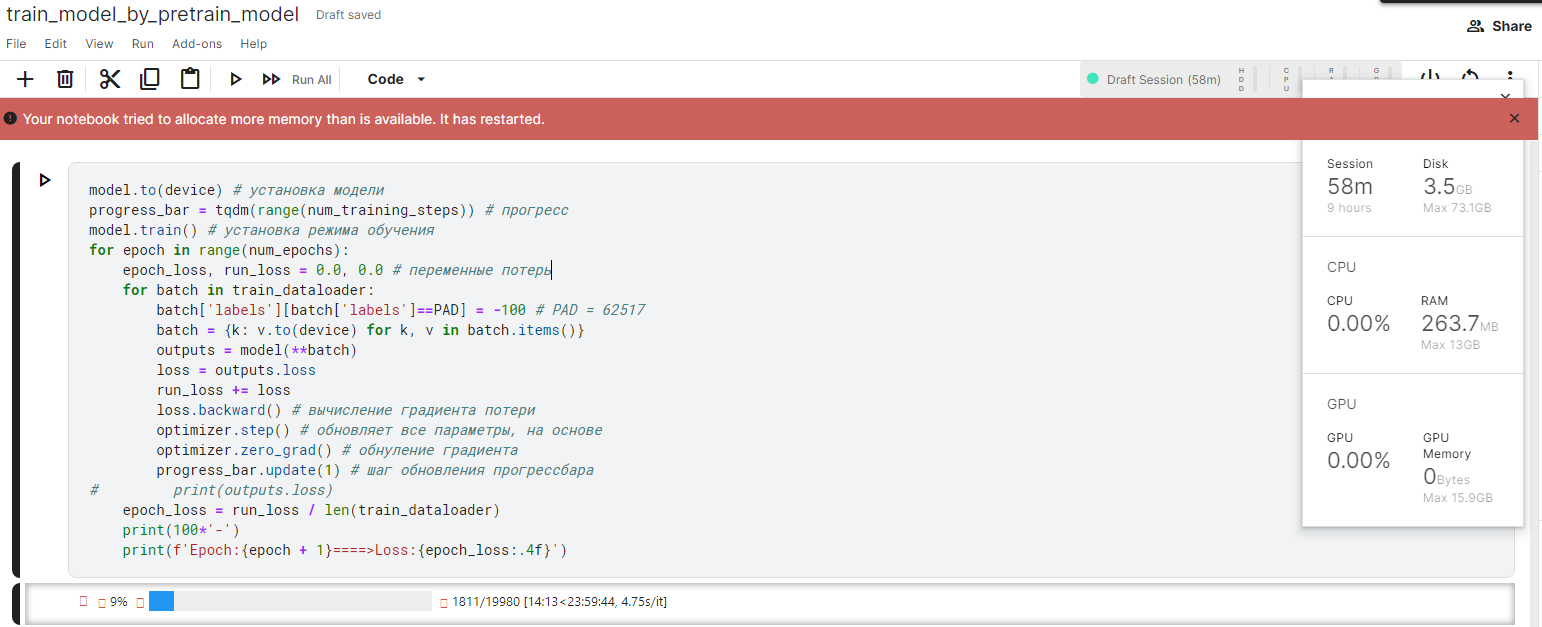

Аналогичная проблема возникает при попытке применить библиотеку для распределения ресурсов:

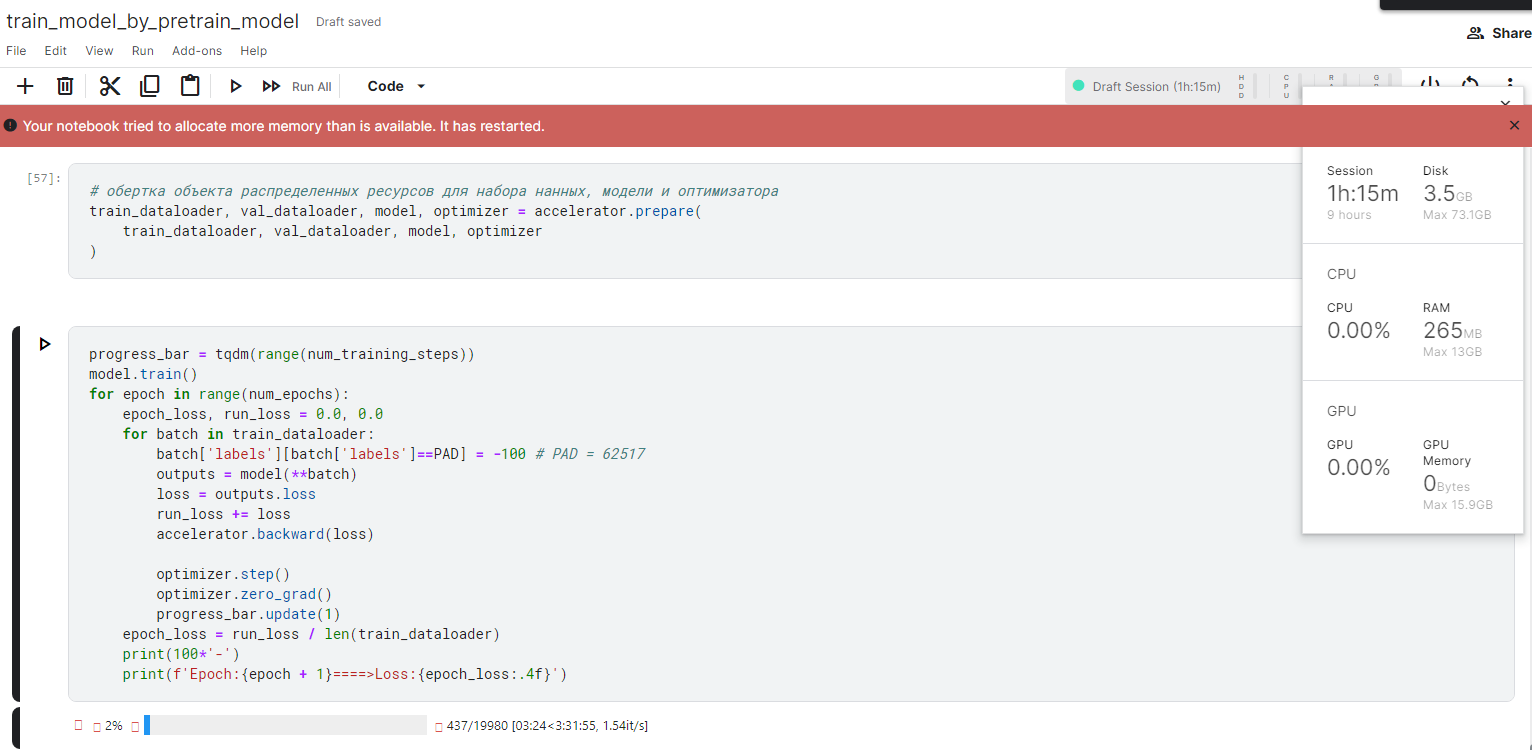

## Файлы модели

**В папке 'first-fine-tuning-model' после сохранения модели созданы файлы:**
1. config.json 
2. pytorch_model.bin

**После сохранения токенизатора:**
1. source_spm
2. target_spm
3. vocab.json
4. tokenizer_config.json
5. special_tokens_map.json

**Должен был быть создан файл (но его нет; возможно при обновлении токенизатора появится):**
* added_tokens.json